In [1]:
%cd /home/wallarelvo/Projects/proctr/
%matplotlib inline

/home/wallarelvo/Projects/proctr


In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Loads Data

In [23]:
days = list()
max_p = 0
for i in xrange(7):
    df = pd.read_csv(
        "data/rates-{}.csv".format(i),
        names=["time", "rate", "pdf"],
        parse_dates=["time"],
        infer_datetime_format=True)
    df_max_p = df["pdf"].max()
    if df_max_p > max_p:
        max_p = df_max_p
    days.append(df)

# Plots Rates

In [24]:
def plot_rate_dist(df, ax, title):
    n_dates = 6 * 24
    n_rates = 100
    x = np.resize(df["time"], (n_dates, n_rates))
    y = np.resize(df["rate"], (n_dates, n_rates))
    z = np.resize(df["pdf"], (n_dates, n_rates))
    g = ax.contourf(x, y, z, cmap="BuPu", vmin=0, vmax=max_p)
    #ax.set_xlabel("Time")
    ax.set_ylabel("Rate")
    xticklabels = list()
    ax.set_xticklabels(["00", "03", "06", "09", "12", "15", "18", "21"])
    ax.set_title(title)
    return g

# Rate Distributions

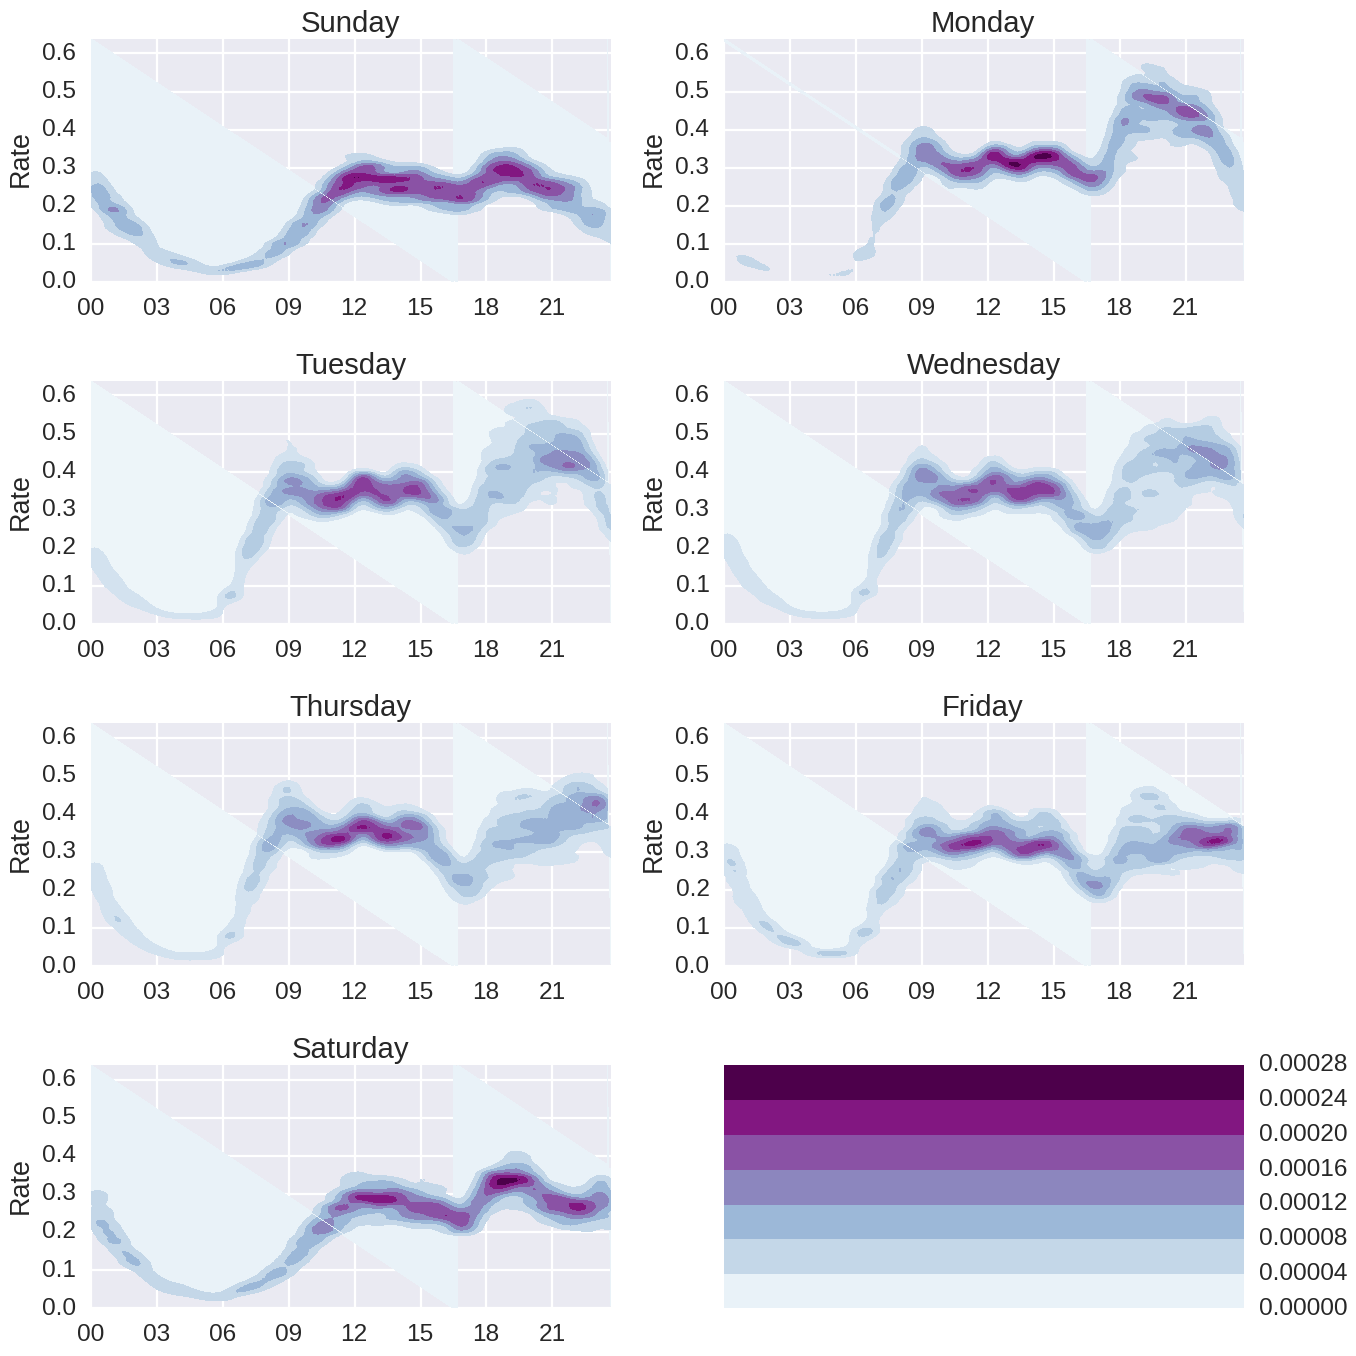

In [25]:
sns.set_context("poster", font_scale=1.1)
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()
weekdays = ["Sunday", "Monday", "Tuesday",
            "Wednesday", "Thursday", "Friday", "Saturday"]
for i in xrange(7):
    g = plot_rate_dist(days[i], axes[i], weekdays[i])
plt.colorbar(g, cax=axes[-1])
plt.tight_layout()

In [6]:
df = pd.read_csv(
    "../mod/data/trip_data_5.csv",
    nrows=500000,
    parse_dates=[5, 6],
    infer_datetime_format=True,
    index_col=[5])

In [16]:
subdf = df["2013-05-01 00:00:01":"2013-05-02 00:00:00"]

In [61]:
dt = pd.Timedelta("60Min")
ts = list()
freqs = np.zeros((24,))
taxis = np.zeros((24,))
t = pd.Timestamp("2013-05-01 00:00:00")
for i in xrange(24):
    ts.append(t)
    freqs[i] = subdf[t:t + dt]["medallion"].shape[0]
    taxis[i] = len(set(subdf[t:t + dt]["medallion"]))
    t += dt
data = np.zeros((24, 2))
data[:, 0] = freqs
data[:, 1] = taxis
data_df = pd.DataFrame(index=ts, data=data, columns=["requests", "taxis"])
data_df.to_csv("sandbox/taxis.csv")

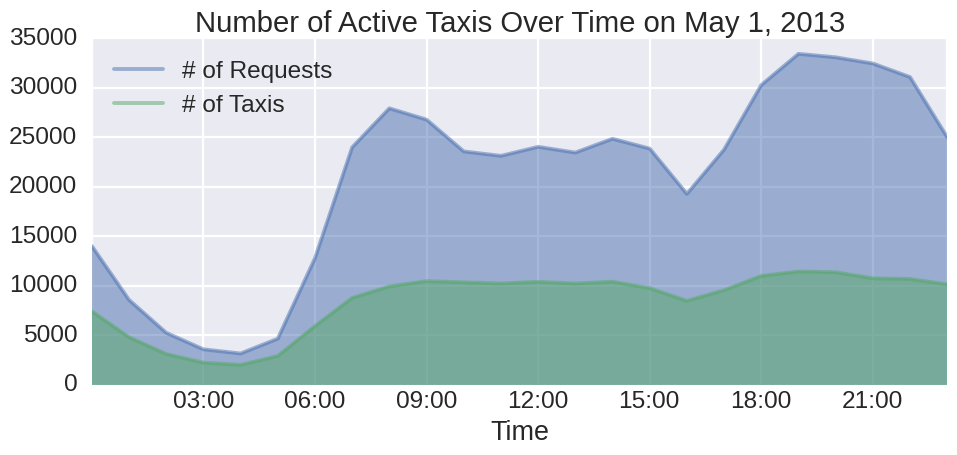

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = data_df.plot.area(stacked=False, ax=ax)
ax.set_xlabel("Time")
#ax.set_ylabel("Number of Active Taxis")
ax.set_title("Number of Active Taxis Over Time on May 1, 2013")
xticks = ax.xaxis.get_major_ticks()[0].label1.set_visible(False)
handles, _ = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ["# of Requests", "# of Taxis"],
               loc="upper left")
plt.tight_layout()